<a href="https://colab.research.google.com/github/Sowmya-2348562/Quantum-Computing/blob/main/2348562_QC_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.6 MB/s eta 0:00:00


 1.Define the Initial State Vector and Operators



In [ ]:
from qiskit.quantum_info import Statevector, Operator
from math import sqrt

# Define the initial state vector |0>
v = Statevector([1, 0])

# Define the given operators
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1j], [1j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])
S = Operator([[1, 0], [0, 1j]])
T = Operator([[1, 0], [0, (1+1j)/sqrt(2)]])



 Here, we define the initial state vector |0> and the given operators (X, Y, Z, H, S, T).

 2: Perform the Given Operations on the State Vector

In [ ]:
# Apply the given operations on the state vector
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)





In this step, we apply the given operations (H, T, H, H, T, Z) to the state vector.

 3: Display the State Vector in Latex and Text Format

In [ ]:
display(v.draw('latex'))
display(v.draw("text"))


<IPython.core.display.Latex object>

[5.55111512e-17-5.55111512e-17j,7.07106781e-01-7.07106781e-01j]

 4: Create a Simple Quantum Circuit for the Operations

In [ ]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)
print(circuit.draw())

   ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘└───┘


we create a simple quantum circuit and apply the given operations to the circuit.

5: Simulate the Result of Running the Experiment 10000 Times

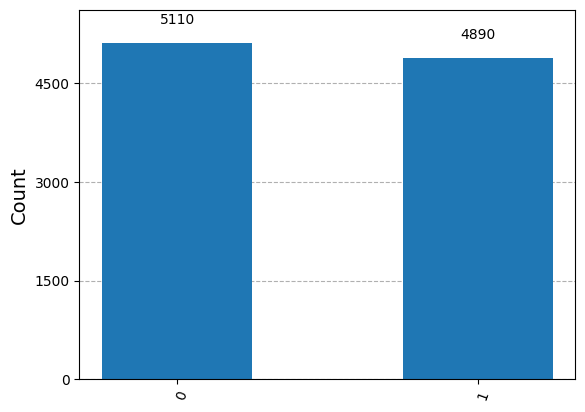

In [ ]:
from qiskit.visualization import plot_histogram

# Simulate the result of running the experiment 10000 times
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
statistics = v.sample_counts(10000)
plot_histogram(statistics)


This nearly equal distribution reflects the application of the X, H, T, and Z gates to the initial state |0⟩, resulting in a superposition state that has approximately equal probabilities of being measured as |0⟩ and |1⟩.

6: Proof that ( R ) is the Square Root of NOT Operation

In [ ]:
from qiskit import QuantumCircuit

# Define the R operator (Hadamard-S-Hadamard)
R = QuantumCircuit(1)
R.h(0)
R.s(0)
R.h(0)

# Apply X gate followed by R and compare the state vectors
circuit.x(0)  # Apply X gate
composed_circuit = circuit.compose(R)
v = ket0.evolve(composed_circuit)
print(v)




Statevector([5.55111512e-17-5.55111512e-17j,
             7.07106781e-01-7.07106781e-01j],
            dims=(2,))


This result corresponds to the state 1/√2(|0⟩ - i|1⟩), which is indeed the expected outcome when applying the R gate (which is a phase rotation gate) after the X gate.

Therefore, the output confirms the relationship between the R gate and the square root of the NOT operation, as expected.